In [31]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split

In [32]:
df=pd.read_csv("customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
df.isnull().sum()[df.isnull().sum()>0]

totalcharges    11
dtype: int64

In [34]:
df.columns=df.columns.str.lower().str.replace(" ","_")
df.head(3)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


<Axes: xlabel='churn'>

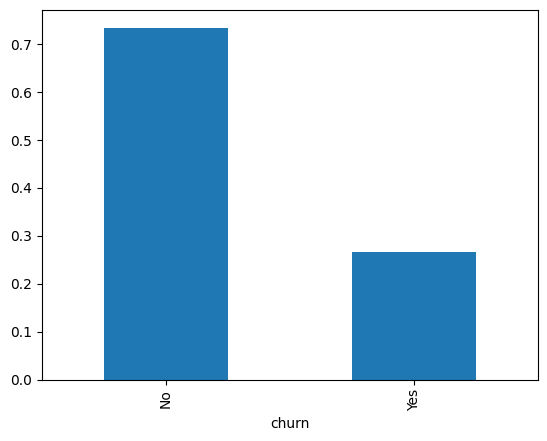

In [39]:
df.churn.value_counts(normalize=True).plot(kind='bar')

In [40]:
df['totalcharges']=pd.to_numeric(df.totalcharges, errors='coerce' )


In [63]:
str_cols=list(df.dtypes[df.dtypes=='object'].index)
for col in str_cols:
    df[col]=df[col].str.lower().str.replace(" ","_")

df.head()

bools_col=['dependents','partner','phoneservice',
           'onlinesecurity','deviceprotection','multiplelines',
           'techsupport','streamingtv','streamingmovies','paperlessbilling','churn'
           ]

In [64]:
for col in bools_col:
    df[col]=(df[col]=='yes').astype(int)

In [68]:
df.totalcharges=df.totalcharges.fillna(0)
numerical=['tenure','monthlycharges','totalcharges']
categorical=list(set(df.columns)-set(numerical)-set(['churn','customerid']))

df[categorical].nunique()

paymentmethod       4
seniorcitizen       2
phoneservice        1
gender              2
paperlessbilling    1
partner             1
deviceprotection    1
streamingmovies     1
streamingtv         1
techsupport         1
internetservice     3
onlinesecurity      1
multiplelines       1
onlinebackup        3
contract            3
dependents          1
dtype: int64

In [46]:
df_full_train,df_test=train_test_split(df,test_size=0.2,random_state=2)
df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=1)
print(len(df_full_train),len(df_train),len(df_val))

5634 4225 1409


In [47]:
y_train=df_train.values
y_test=df_test.values
y_val=df_val.values

In [49]:
df.churn.value_counts(normalize=True)

churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [22]:
1409+4225

5634